# Dataset - Iris

## Basics

In [9]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset from sklearn
iris = load_iris()

# Convert dataset into pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(f"**** Data Frame - Initial:\n{iris_df.describe()}")

iris_df['target'] = iris.target
print(f"**** Target:\n{iris_df['target'].describe()}")

# Map target values to target names
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

**** Data Frame - Initial:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
**** Target:
count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000


In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Histogram

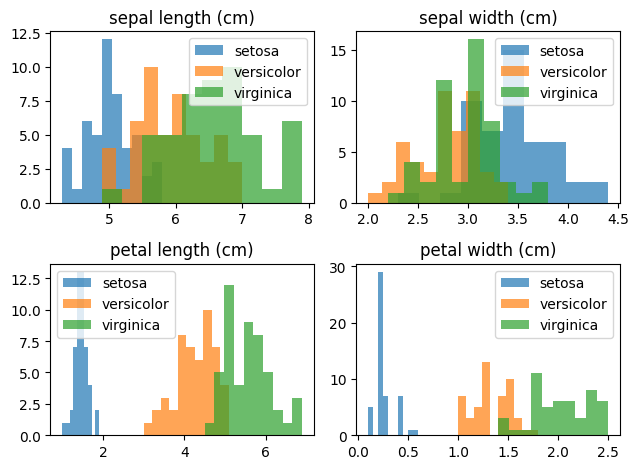

In [13]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2)

# Create histograms for each feature
features = iris.feature_names
for i, ax in enumerate(axs.flat):
    if i < len(features):
        for label in iris_df['target'].unique():
            ax.hist(iris_df[iris_df['target'] == label][features[i]], label=label, alpha=0.7)
            ax.set_title(features[i])
            ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Scatter

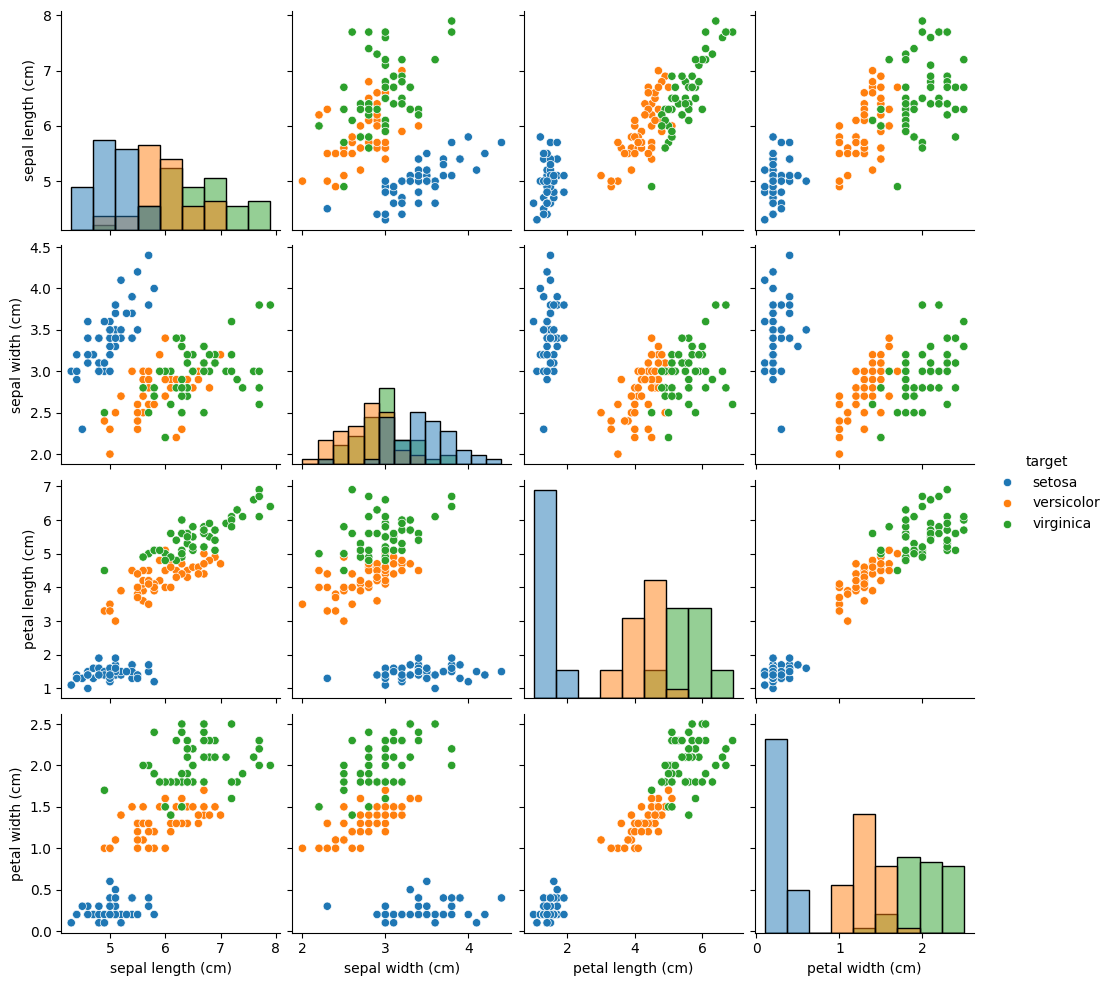

In [17]:
import seaborn as sns

# Create a pairplot (scatter plot matrix)
sns.pairplot(iris_df, hue='target', diag_kind='hist')

# Show the plot
plt.show()


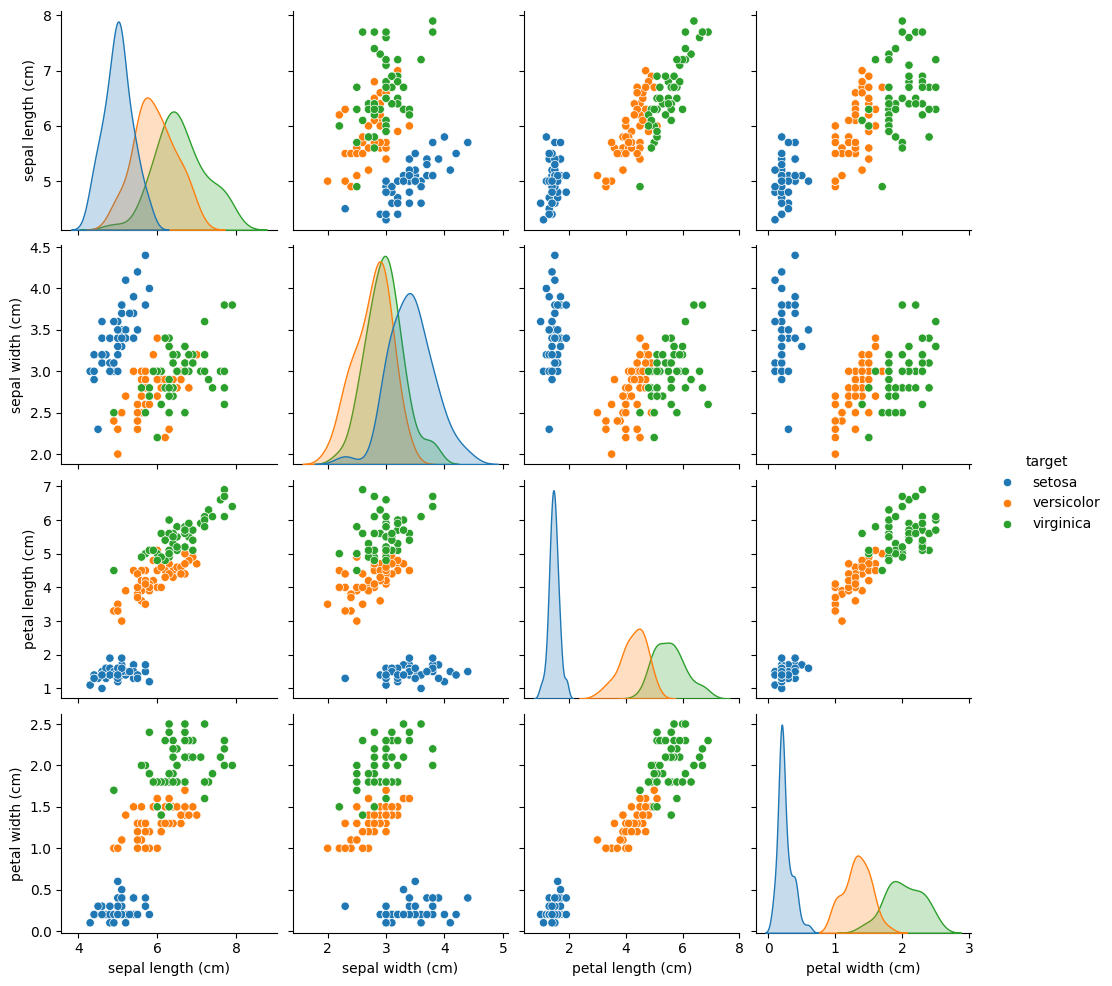

In [14]:
# plot data with kde
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue='target')
plt.show()


## Distributions

## Standardization and Normalization

**Normalization** typically refers to the process of scaling numeric data from 0 to 1. **Standardization** transforms data to have a mean of zero and a standard deviation of 1. Both processes can be important steps in data preprocessing, especially when preparing data for machine learning algorithms.

> Please note that normalization and standardization are different techniques, and which one to use depends on the context. For example, normalization is often good when your data doesn't follow a Gaussian distribution, or when you know the boundaries of your data. Standardization, on the other hand, can be useful when the data follows a Gaussian distribution, but the mean and standard deviation vary a lot.


Original Features
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

Standardized Features
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           0.00         0.00         -0.00        -0.00
std            1.00         1.00          1.00         1.00
min           -1.87        -2.43         -1.57        -1.45
25%           -0.90        -0.59         -1.23        -1.18
50%           -0.05        -0.13          0.33         0.13

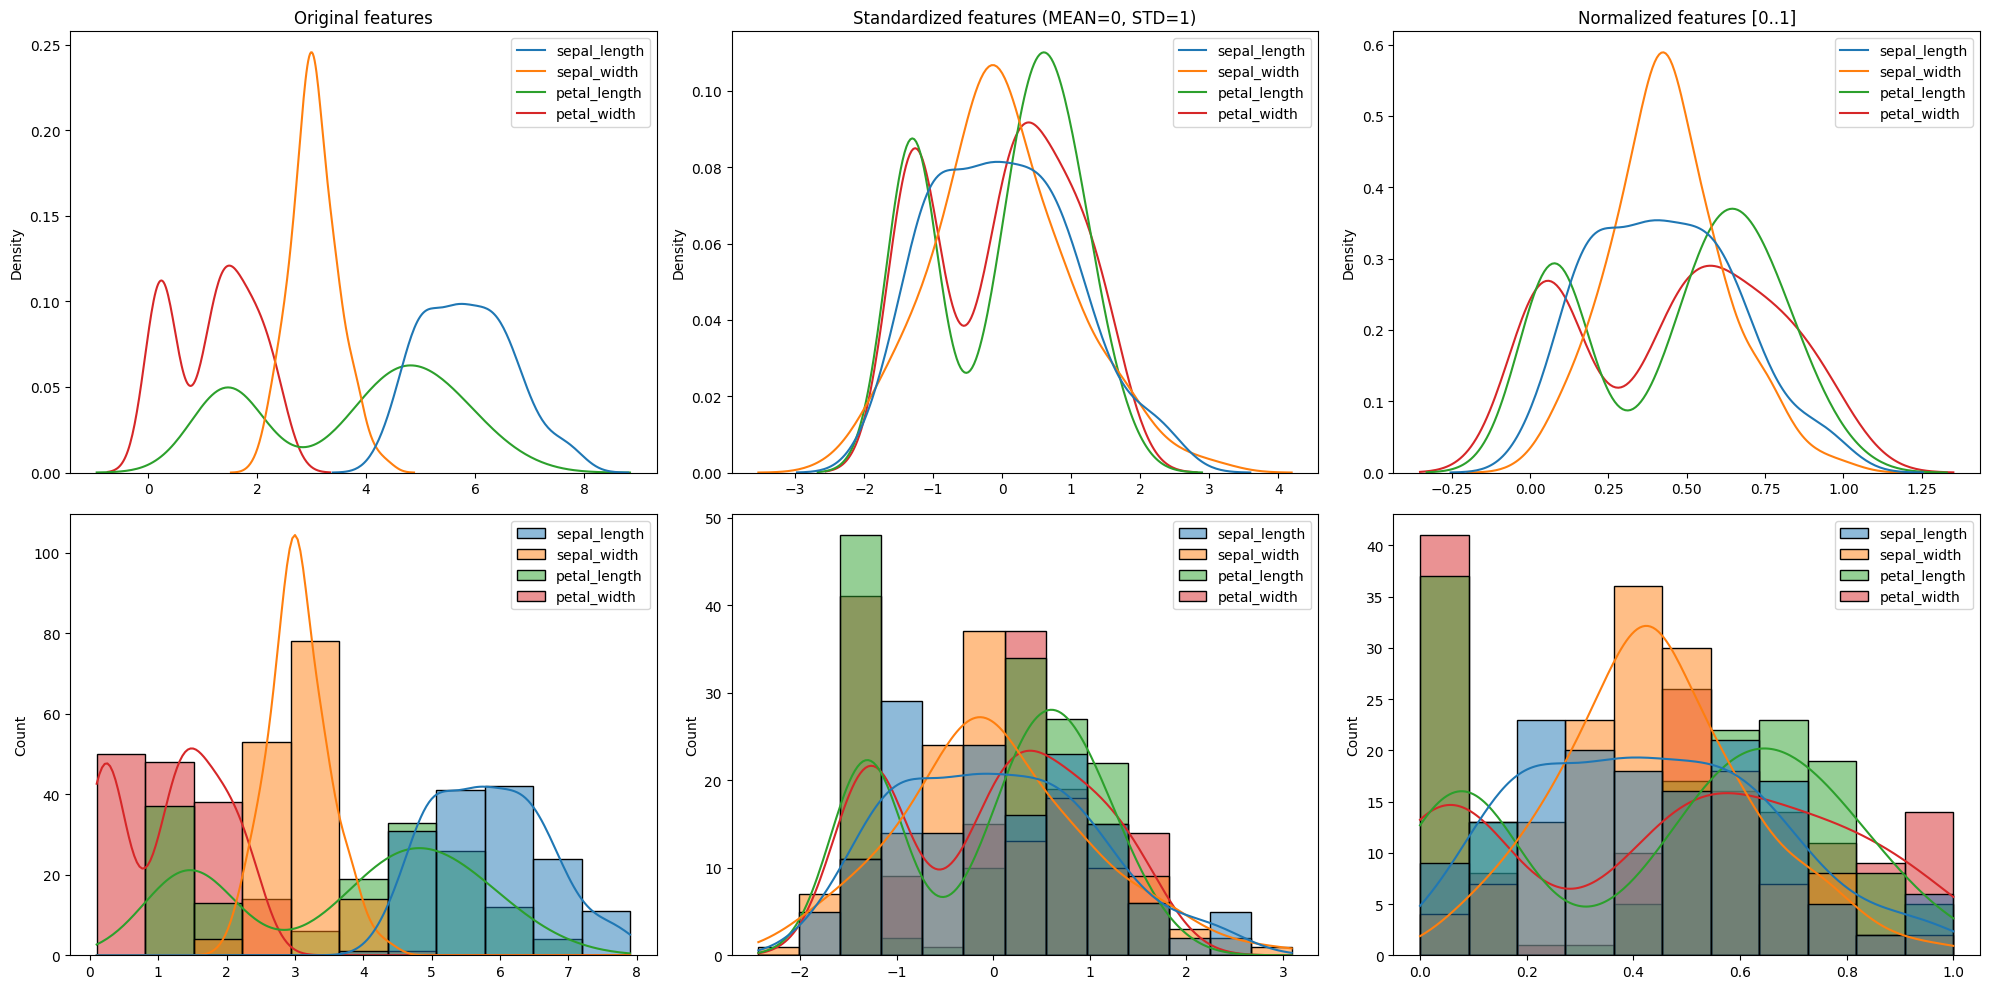

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Set pandas display options
pd.options.display.float_format = "{:.2f}".format

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Separate features from the target
features = iris.drop('species', axis=1)
target = iris['species']

# Create scalers
scaler_std = StandardScaler()
scaler_norm = MinMaxScaler()

# Standardization and Normalization
std_features = pd.DataFrame(scaler_std.fit_transform(features), columns=features.columns)
norm_features = pd.DataFrame(scaler_norm.fit_transform(features), columns=features.columns)

# Round to two decimal places
std_features = std_features.round(2)
norm_features = norm_features.round(2)

# Print statistics
print("Original Features")
print(features.describe())
print("\nStandardized Features")
print(std_features.describe())
print("\nNormalized Features")
print(norm_features.describe())

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# KDE plots
# Original data plot
sns.kdeplot(data=features, ax=axs[0, 0])
axs[0, 0].set_title('Original features')

# Standardized data plot
sns.kdeplot(data=std_features, ax=axs[0, 1])
axs[0, 1].set_title('Standardized features (MEAN=0, STD=1)')

# Normalized data plot
sns.kdeplot(data=norm_features, ax=axs[0, 2])
axs[0, 2].set_title('Normalized features [0..1]')

# Histograms
# Original data histogram
sns.histplot(data=features, ax=axs[1, 0], kde=True)

# Standardized data histogram
sns.histplot(data=std_features, ax=axs[1, 1], kde=True)

# Normalized data histogram
sns.histplot(data=norm_features, ax=axs[1, 2], kde=True)

plt.tight_layout()
plt.show()


### Normalization (Min/Max)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data
X_test_normalized = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_normalized, y_train)

# Check the accuracy
accuracy = knn.score(X_test_normalized, y_test)
print(f"KNN accuracy with normalized data: {accuracy}")


KNN accuracy with normalized data: 1.0


### Standardization (Z-Score)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_standardized = scaler.fit_transform(X_train)

# Transform the test data
X_test_standardized = scaler.transform(X_test)

# Train a SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_standardized, y_train)

# Check the accuracy
accuracy = svm.score(X_test_standardized, y_test)
print(f"SVM accuracy with standardized data: {accuracy}")


SVM accuracy with standardized data: 0.956140350877193


## Clustering


### KMeans

#### Elbow 

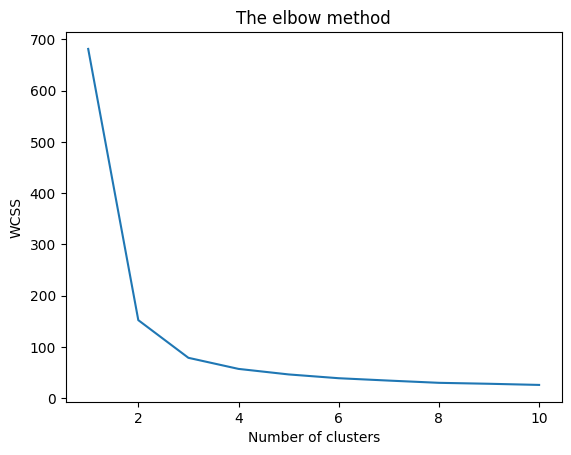

In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Iris Dataset
iris = load_iris()
X = iris.data

# WCSS (Within Cluster Sum of Squares)
wcss = []

# Calculating WCSS for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


#### Using a value around the elbow number (2-3)

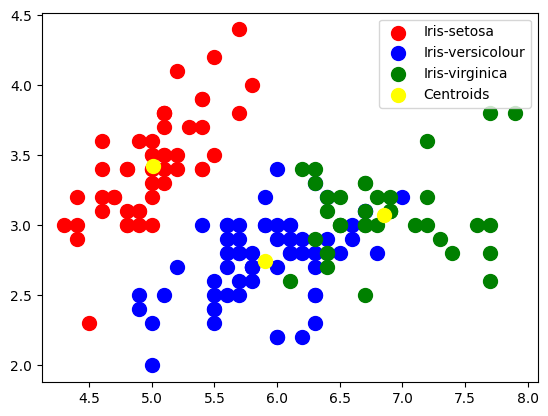

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Iris Dataset
iris = load_iris()
X = iris.data

# KMeans Clustering
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Plotting
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


### Hierarchical


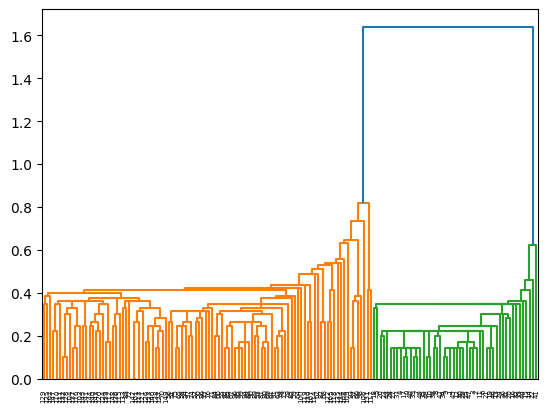

In [20]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Load Iris Dataset
iris = load_iris()
X = iris.data

# Hierarchical Clustering
linked = linkage(X, 'single')

# Plotting Dendrogram
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
